# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [1]:
#include "includeLibraries.h"
#include <opencv2/opencv.hpp>
#include "matplotlibcpp.h"
#include "displayImages.h"

In [2]:
using namespace std;

In [3]:
using namespace cv;

In [4]:
using namespace matplotlibcpp;

### PencilSketch:
initially the source image is converted to grayscale, blurred with gaussian, then a Laplacian function has been used for the edges, and finally thresholding function has is applied to get the intendent output Sketch filter. 

In [5]:
Mat pencilSketch(Mat image, int arguments=0){
    
    Mat pencilSketchImage;
    
    /// YOUR CODE HERE
    
     // Convert color image to grayscale image
    Mat gray;
    cvtColor(image, gray, COLOR_BGR2GRAY);

    // smoothing/blurring the image with gaussian to remove the noise
    // using 3x3 kernel
    Mat blurredImage;
    GaussianBlur(gray, blurredImage,Size(3,3),0);

     // Apply Laplacian edge detector to the blurred image
    // Parameters:
    //  - blurredImage: Input image after Gaussian blur
    //  - laplacian: Output image containing the Laplacian edges
    //  - CV_8U: Output image depth (8-bit unsigned)
    //  - 5: Aperture size for the Laplacian kernel (size of the filter)
    //  - 2.5: Scale factor for the Laplacian result
    //  - 0: Delta offset (no offset in this case)
    //  - BORDER_DEFAULT: Pixel extrapolation method at the image border
    Mat laplacian;
    Laplacian(blurredImage, laplacian, CV_8U, 5, 2.5, 0, BORDER_DEFAULT);

    
    //Thresholding the image
    // - 254: Low threshold
    // - 255: High threshold
    // - Threshold type: THRESH_BINARY_INV
    Mat thresh;
    threshold(laplacian, thresh, 254, 255, cv::THRESH_BINARY_INV);

    // Copy the thresholded image to the output variable
    thresh.copyTo(pencilSketchImage);
    
   
    return pencilSketchImage;
}

### Cartoonify:
The same process as the Sketch image is used. In addition, the thresholded image is converted to color image and a bitwise AND operation is applied to get the indtendent output cartoonify filter. 

In [6]:
Mat cartoonify(Mat image, int arguments = 0) {
    Mat cartoonImage;

    // Convert color image to grayscale image
    Mat gray;
    cvtColor(image, gray, COLOR_BGR2GRAY);
    
    // Smoothing/blurring the image with Gaussian blur to remove noise
    // Using a 3x3 kernel
    Mat blurredImage;
    GaussianBlur(gray, blurredImage,Size(3,3),0);

    
    // Apply Laplacian edge detector to the blurred image
    // Parameters:
    //  - blurredImage: Input image after Gaussian blur
    //  - laplacian: Output image containing the Laplacian edges
    //  - CV_8U: Output image depth (8-bit unsigned)
    //  - 5: Aperture size for the Laplacian kernel (size of the filter)
    //  - 2.5: Scale factor for the Laplacian result
    //  - 0: Delta offset (no offset in this case)
    //  - BORDER_DEFAULT: Pixel extrapolation method at the image border
    Mat laplacian;
    Laplacian(blurredImage, laplacian, CV_8U,  5, 2.5, 0, BORDER_DEFAULT);

    
    //Thresholding the image
    // - 254: Low threshold
    // - 255: High threshold
    // - Threshold type: THRESH_BINARY_INV
    Mat thresh;
    threshold(laplacian, thresh, 254,255, THRESH_BINARY_INV);

    // Creating a 3-channel image to match the original image format
    Mat threshColor;
    cvtColor(thresh, threshColor, COLOR_GRAY2BGR);

    // Bitwise AND to get the final cartoon image
    bitwise_and(image, threshColor, cartoonImage);

    return cartoonImage;
    
}

In [7]:
string imagePath = DATA_PATH + "images/trump.jpg";
Mat image = imread(imagePath);

Mat cartoonImage = cartoonify(image);
Mat pencilSketchImage = pencilSketch(image);

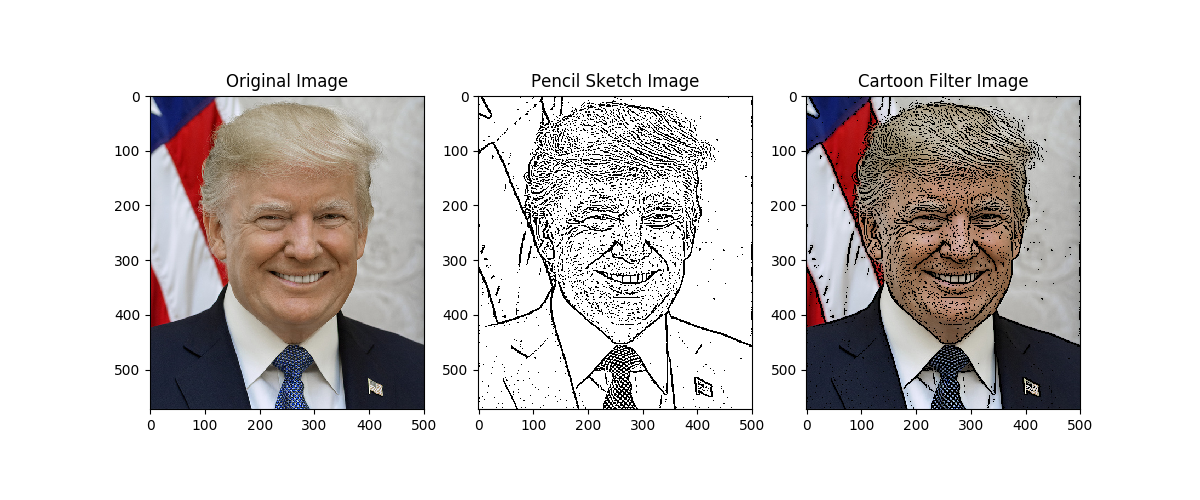

In [8]:
plt::figure_size(1200,500);
plt::subplot(1,3,1);
plt::imshow(image);
plt::title("Original Image");
auto pltImg = displayImage(image);
plt::subplot(1,3,2);
plt::imshow(pencilSketchImage);
plt::title("Pencil Sketch Image");
pltImg = displayImage(pencilSketchImage);
plt::subplot(1,3,3);
plt::imshow(cartoonImage);
plt::title("Cartoon Filter Image");
pltImg = displayImage(cartoonImage);
pltImg

### Detail enhancing  filter with shadow effect:
DetailEnhancedFilter from OpenCV is applied, for the color image with sigma_s = 100, sigma_r = 0.7, then a bitwise AND operation is used to get the intendent output filter.

In [9]:
Mat shadowFilterWithDetailEnhanced(Mat image, int arguments = 0) {
    Mat shadowImage;

    // Smoothing/blurring the image with Gaussian blur to remove noise
    // Using a 3x3 kernel
    Mat blurredImage;
    GaussianBlur(image, blurredImage,Size(3,3),0);
    
    
    double sigma_s, sigma_r;
    detailEnhance(blurredImage, shadowImage, sigma_s=100, sigma_r=0.7f);

    // Bitwise AND to get the final cartoon image
    bitwise_and(shadowImage, shadowImage, shadowImage);

    return shadowImage;
    
}

In [10]:
Mat shadow = shadowFilterWithDetailEnhanced(image);

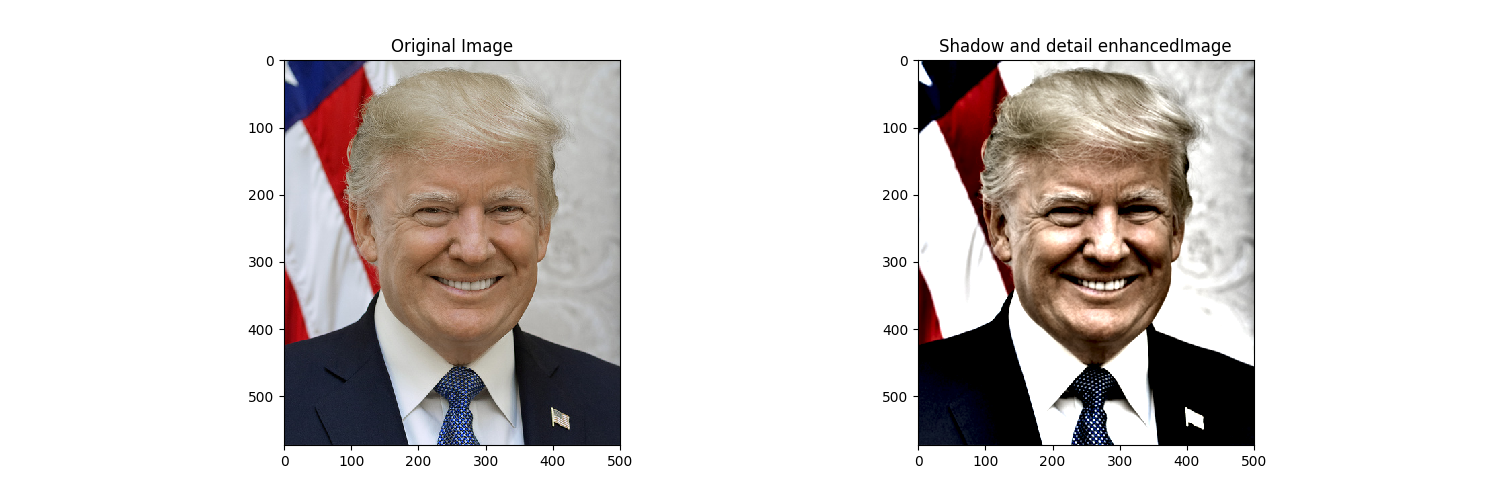

In [11]:
plt::figure_size(1500,500);
plt::subplot(1,2,1);
plt::imshow(image);
plt::title("Original Image");
 pltImg = displayImage(image);
plt::subplot(1,2,2);
plt::imshow(shadow);
plt::title("Shadow and detail enhancedImage");
pltImg = displayImage(shadow);
pltImg

### Cheers!